# Plasma proteome profiling discovers novel proteins associated with non-alcoholic fatty liver disease
Liu et al. 2019

In [1]:
import alphastats
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook" 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/drq441/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning:

The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



In [2]:
# we are going to load the proteomics data
loader = alphastats.MaxQuantLoader(
    file = "../testfiles/maxquant/proteinGroups.txt", 
    intensity_column="LFQ intensity [sample]",
    # for indexing we are going to use the gene name columm
    # it is adivsed to use the ProteinIDs for indexing as these are unique
    index_column="Gene names",
    gene_names_column=None
)
dataset = alphastats.DataSet(
    loader = loader, 
    metadata_path="../testfiles/maxquant/metadata.xlsx", 
    sample_column="sample"
)

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:	Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).


The metadata contains pretty long names, in the first step we are going to replace the names with abbreviations to make the analysis more straightforward.

In [3]:
new_names = {
    "non-alcoholic fatty liver disease": "NAFLD",
    "type 2 diabetes mellitus": "T2DM",
    "type 2 diabetes mellitus|non-alcoholic fatty liver disease": "T2DM+NAFLD"
}
dataset.metadata["disease"].replace(new_names, inplace=True)

In [4]:
dataset.preprocess(
    remove_contaminations=True, 
    subset=True, 
    imputation="knn", 
    normalization="quantile"
)

/Users/drq441/Documents/GitHub/alphastats/alphastats/DataSet_Preprocess.py:41: FutureWarning:

In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.



In [22]:
dataset.preprocessing_info

{'Raw data number of Protein Groups': 2596,
 'Matrix: Number of ProteinIDs/ProteinGroups': 1811,
 'Matrix: Number of samples': 48,
 'Intensity used for analysis': 'LFQ intensity [sample]',
 'Normalization': 'quantile',
 'Imputation': 'k-Nearest Neighbor',
 'Contaminations have been removed': True,
 'Contamination columns': ['Only identified by site',
  'Reverse',
  'Potential contaminant',
  'contamination_library'],
 'Number of removed ProteinGroups due to contaminaton': 98}

## Plot Volcano

Calculating t-test...


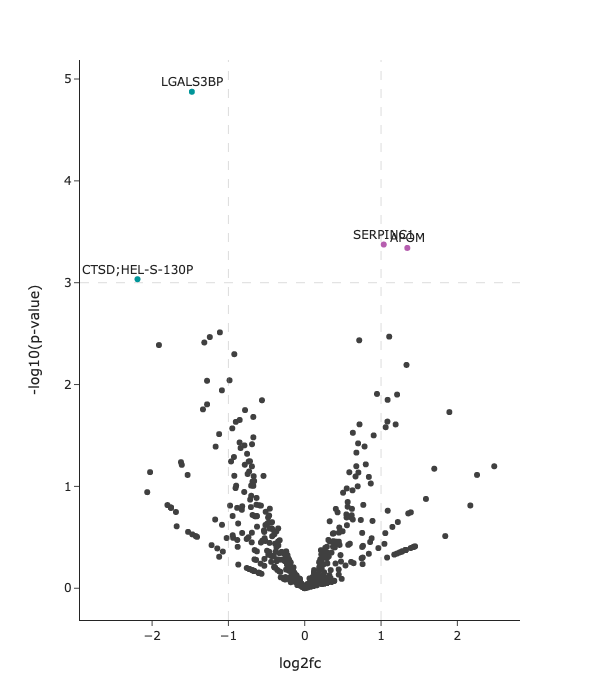

In [5]:
volcano_plot = dataset.plot_volcano(
    column="disease", # column in metadata
    group1="T2DM",
    group2="T2DM+NAFLD",
    labels=True, # add label to significantly enriched proteins
    alpha=0.001 # cutoff for pvalue
)
volcano_plot.show(renderer = "png")

## Plot Intensity

In [11]:
dataset.plot_intensity(
        protein_id="LGALS3BP", 
        group="disease", # column in metadata
        subgroups=["T2DM","T2DM+NAFLD"], # we only want to see T2DM and T2DM+NAFLD
        add_significance=True # add bar with pvalue
        )

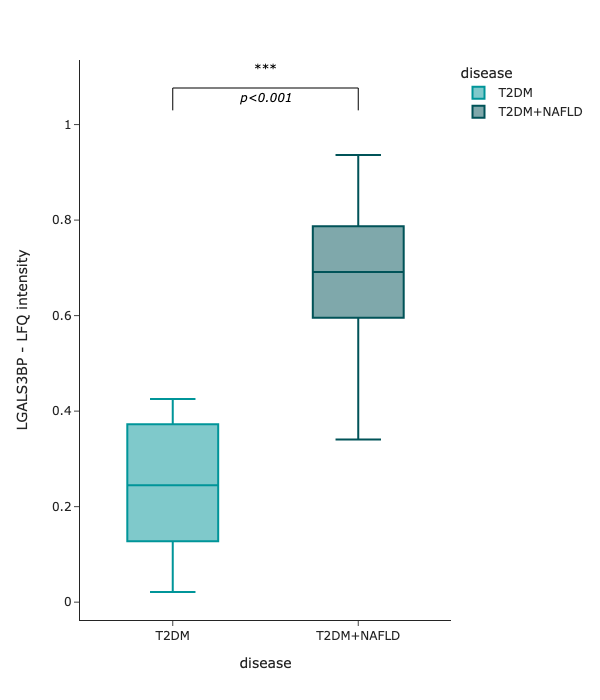

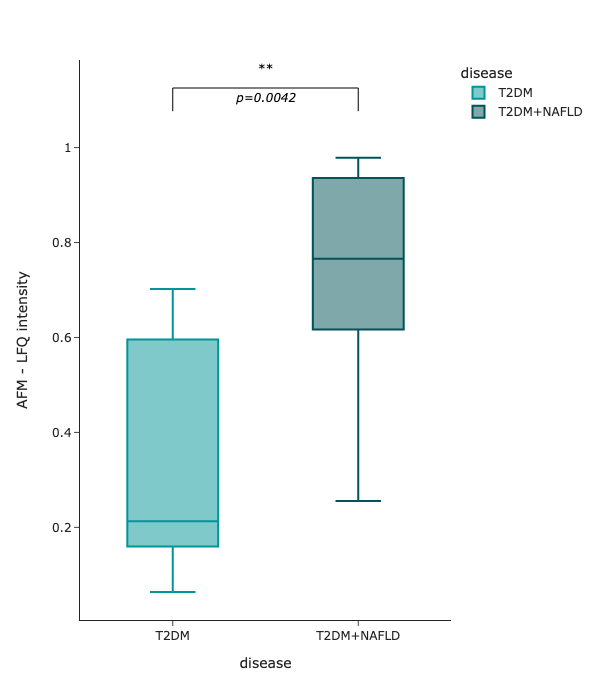

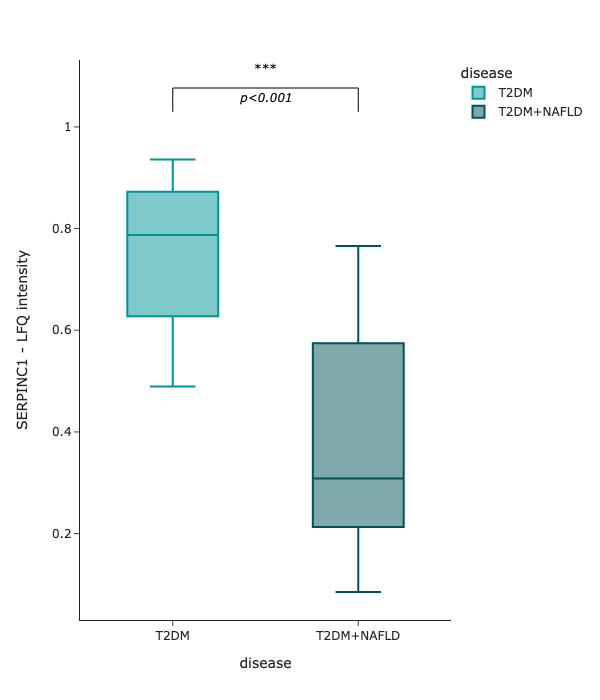

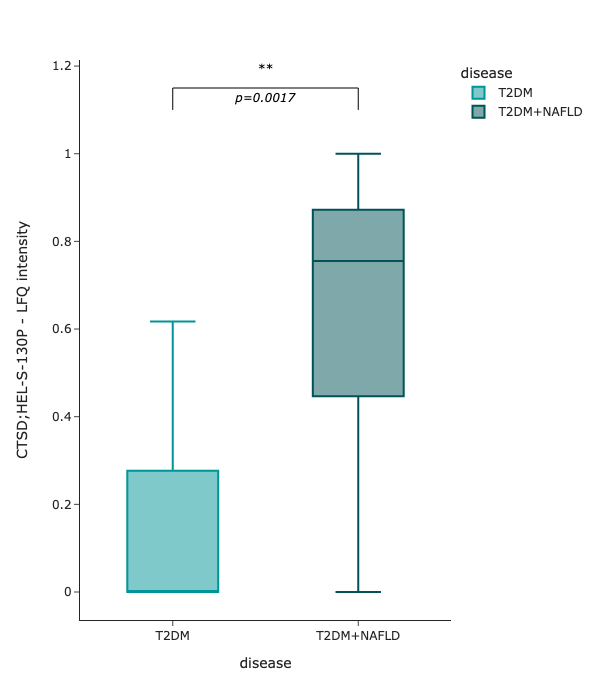

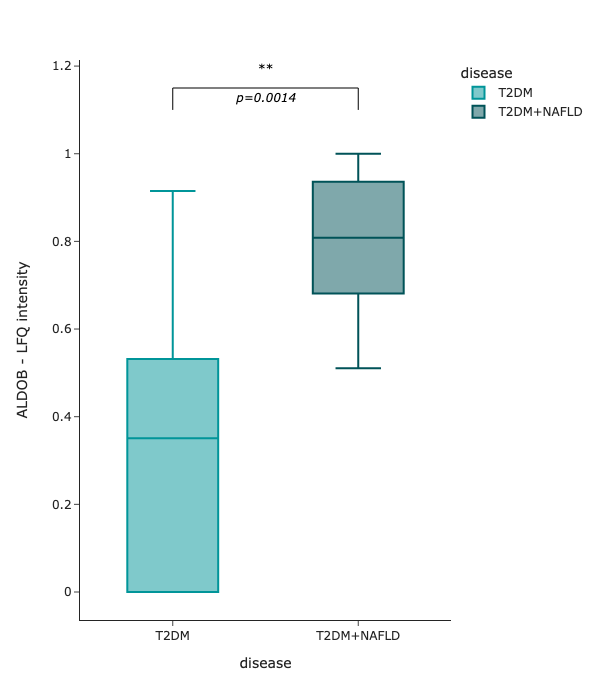

In [6]:
for protein in ["LGALS3BP","AFM","SERPINC1","CTSD;HEL-S-130P","ALDOB"]:
    plot = dataset.plot_intensity(
        protein_id=protein, 
        group="disease", # column in metadata
        subgroups=["T2DM","T2DM+NAFLD"], # we only want to see T2DM and T2DM+NAFLD
        add_significance=True # add bar with pvalue
        )
    plot.show(renderer = "png")

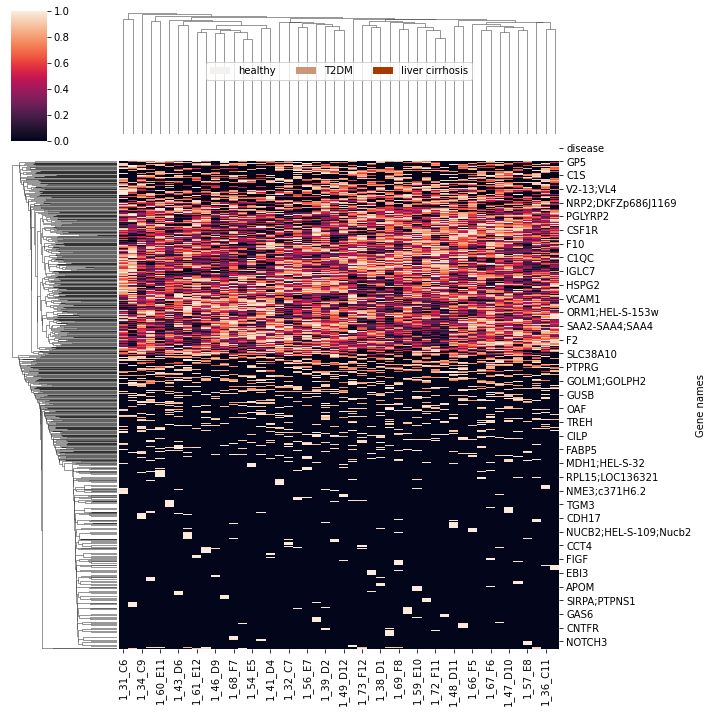

In [7]:
dataset.plot_clustermap(
    label_bar="disease", 
    only_significant=True, 
    group="disease", 
    subgroups=["healthy", "liver cirrhosis", "T2DM"]
)

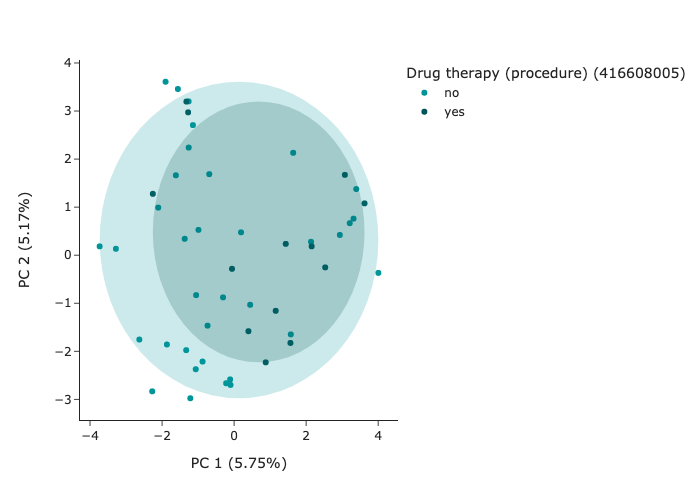

In [8]:
pca_plot = dataset.plot_pca(group= 'Drug therapy (procedure) (416608005)', circle=True )
pca_plot.show(renderer = "png")